<a href="https://colab.research.google.com/github/rgpeople/PCVK_Ganjil_2023/blob/main/pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


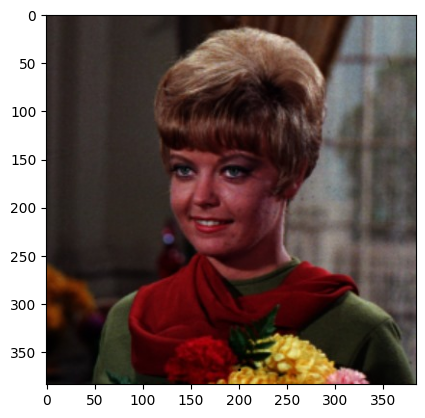

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

def warnaTerdekat(R,G,B):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[255,0,255],[0,255,255],[255,255,255]]
  for i in range(len(warnaPallette)):
    rDiff = R - warnaPallette[i][0]
    gDiff = G - warnaPallette[i][1]
    bDiff = B - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

#img = cv.imread('/content/drive/MyDrive/images/mandrill.tiff')
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

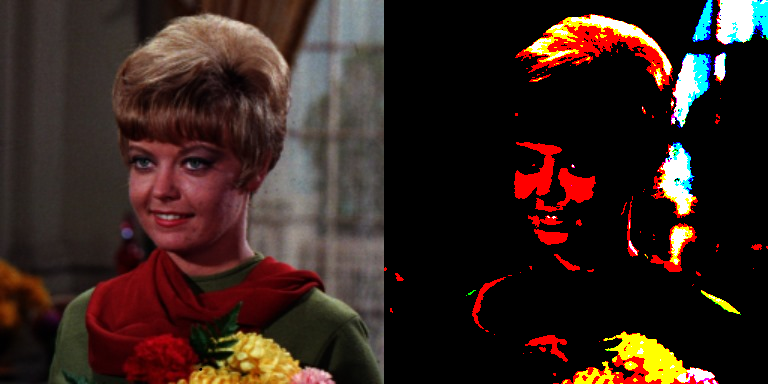

True

In [4]:
warnaPallette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[255,0,255],[0,255,255],[255,255,255]]
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = np.zeros(img.shape, img.dtype)

for y in range(0,img.shape[0]):
  for x in range(0,img.shape[1]):
    baru = warnaTerdekat(img[y,x,0],img[y,x,1],img[y,x,2])
    img_baru[y,x] = warnaPallette[baru]
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = cv.cvtColor(img_baru, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img, img_baru))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/tesfemale.tiff', img_baru)

In [6]:
warnaPallette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[255,0,255],[0,255,0],[255,255,255]]
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
#img = cv.resize(img, (0,0), fx=0.25, fy=0.25)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = np.copy(img)
for y in range(0,1):
  for x in range(0,7):
    baru = warnaTerdekat(img_baru[y,x,0],img_baru[y,x,1],img_baru[y,x,2])
    img_baru[y,x] = warnaPallette[baru]
    errorR = int(img[y,x,0]) - int(img_baru[y,x,0])
    errorG = int(img[y,x,1]) - int(img_baru[y,x,1])
    errorB = int(img[y,x,2]) - int(img_baru[y,x,2])
    img_baru[y+1,x] = [img[y+1,x,0]+((7.0/16.0)*errorR),img[y+1,x,1]+((7.0/16.0)*errorG),img[y+1,x,2]+((7.0/16.0)*errorB)]
    if(y>0):
      img_baru[y-1,x+1] = [img_baru[y-1,x+1,0]+((3.0/16.0)*errorR), img_baru[y-1,x+1,1]+((3.0/16.0)*errorG), img_baru[y-1,x+1,2]+((3.0/16.0)*errorB)]
    img_baru[y,x+1] = [img_baru[y,x+1,0]+((5.0/16.0)*errorR), img_baru[y,x+1,1]+((5.0/16.0)*errorG), img_baru[y,x+1,2]+((5.0/16.0)*errorB)]
    img_baru[y+1,x+1] = [img_baru[y+1,x+1,0]+((1.0/16.0)*errorR), img_baru[y+1,x+1,1]+((1.0/16.0)*errorG), img_baru[y+1,x+1,2]+((1.0/16.0)*errorB)]
'''
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img_baru = cv.cvtColor(img_baru, cv.COLOR_RGB2BGR)
final_frame = cv.hconcat((img, img_baru))
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
'''
#cv2_imshow(img_baru)
#cv.imwrite('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/testlena.jpg', img_baru)
print(img[0,6],' ',img_baru[0,6])


[54 44 42]   [0 0 0]


<ipython-input-8-1a80bac93c4d>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_baru[y+1,x] = [img[y+1,x,0]+(np.float(7.0/16.0)*errorR),img[y+1,x,1]+(np.float(7.0/16.0)*errorG),img[y+1,x,2]+(np.float(7.0/16.0)*errorB)]
<ipython-input-8-1a80bac93c4d>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_baru[y,x+1] = [img[y,x+1,0]+(np

True

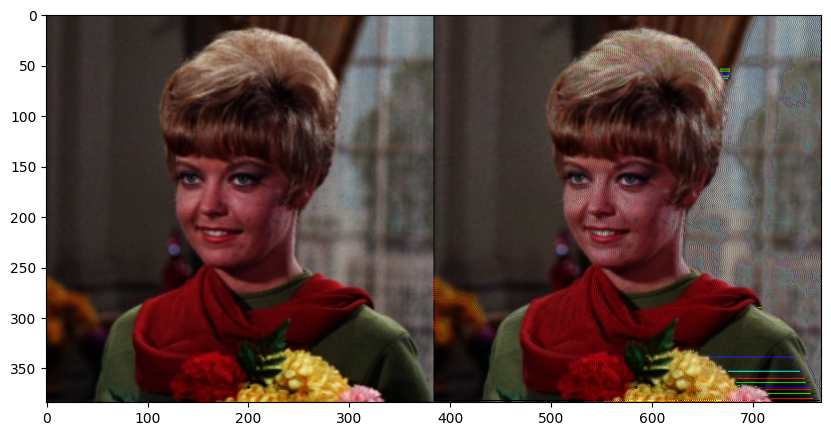

In [8]:
warnaPallette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[255,0,255],[0,255,255],[255,255,255]]
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
#img = cv.resize(img, (0,0), fx=0.25, fy=0.25)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = np.copy(img)
errorR = 0
errorG = 0
errorB = 0

for y in range(img.shape[0]-1):
  for x in range(img.shape[1]-1):
    baru = warnaTerdekat(img_baru[y,x,0],img_baru[y,x,1],img_baru[y,x,2])
    img_baru[y,x] = warnaPallette[baru]
    errorR = int(img[y,x,0]) - int(img_baru[y,x,0])
    errorG = int(img[y,x,1]) - int(img_baru[y,x,1])
    errorB = int(img[y,x,2]) - int(img_baru[y,x,2])
    img_baru[y+1,x] = [img[y+1,x,0]+(np.float(7.0/16.0)*errorR),img[y+1,x,1]+(np.float(7.0/16.0)*errorG),img[y+1,x,2]+(np.float(7.0/16.0)*errorB)]
    if (y>0):
      img_baru[y-1,x+1] = [img[y-1,x+1,0]+(np.float(3.0/16.0)*errorR), img[y-1,x+1,1]+(np.float(3.0/16.0)*errorG), img[y-1,x+1,2]+(np.float(3.0/16.0)*errorB)]
    img_baru[y,x+1] = [img[y,x+1,0]+(np.float(5.0/16.0)*errorR), img[y,x+1,1]+(np.float(5.0/16.0)*errorG), img[y,x+1,2]+(np.float(5.0/16.0)*errorB)]
    img_baru[y+1,x+1] = [img[y+1,x+1,0]+(np.float(1.0/16.0)*errorR), img[y+1,x+1,1]+(np.float(1.0/16.0)*errorG), img[y+1,x+1,2]+(np.float(1.0/16.0)*errorB)]

final_frame = cv.hconcat((img, img_baru))
fig = plt.figure(figsize=(10,10))       #ubah-ubah ukuran (10,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/tesfemale.tiff', img_baru)

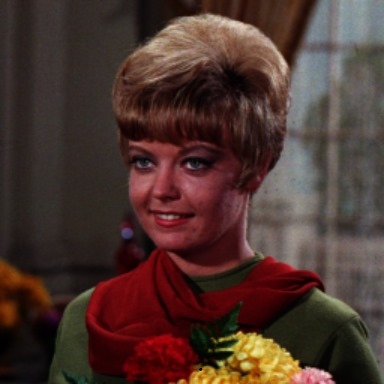

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
cv2_imshow(img)

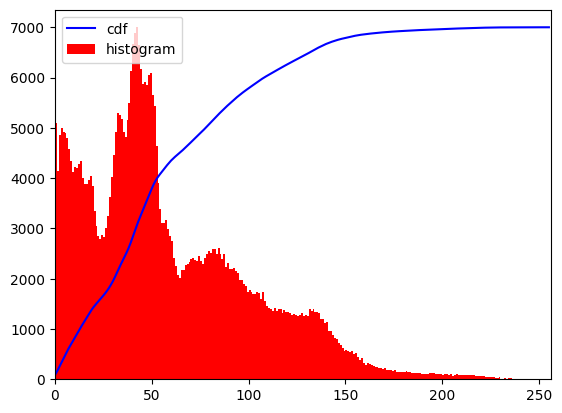

In [10]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

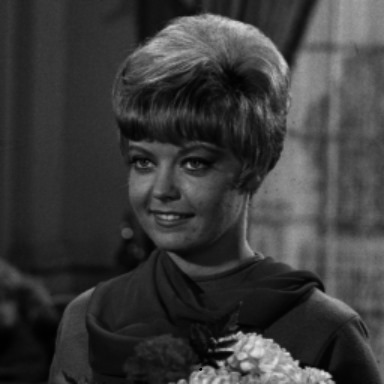

In [11]:
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(img)
cv2_imshow(img)

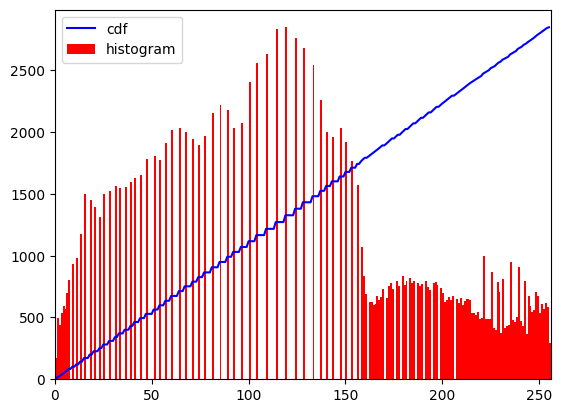

In [12]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [13]:
n = np.zeros((3,256))
n

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

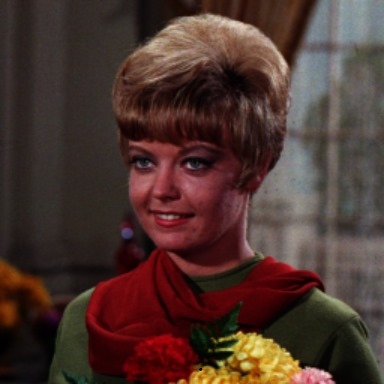

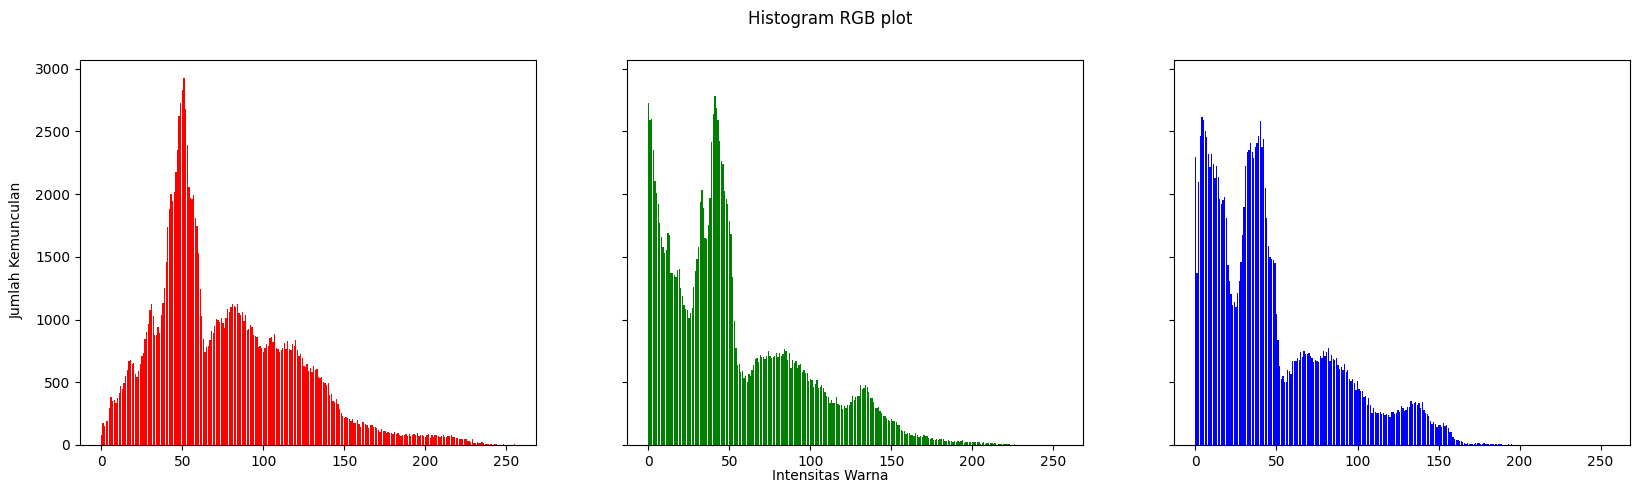

In [14]:
m = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

def histog(image):
  height, width, depth = np.shape(image)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][image[y][x][0]] += 1
      ax[1][image[y][x][1]] += 1
      ax[2][image[y][x][2]] += 1
  return ax

nilai_histo = np.uint16(histog(m))

cv2_imshow(m)
names = np.arange(256)
isgrayimg = (nilai_histo[0]==nilai_histo[1]).all()
if (isgrayimg == False):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  ax1.bar(names, nilai_histo[2], color='red')
  ax2.bar(names, nilai_histo[1], color='green')
  ax3.bar(names, nilai_histo[0], color='blue')
else:
  plt.figure(figsize=(7,7))
  plt.ylabel('Jumlah Kemunculan')
  plt.xlabel('Intensitas Warna')
  plt.bar(names, nilai_histo[0], color='gray')


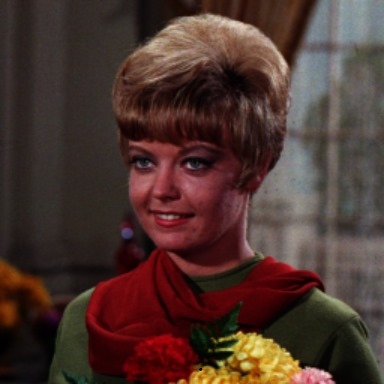

[2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.007e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03 2.048e+03
 2.048e+03 2.048e+03 2.048e+03 2.048e+03 1.944e+03 1.934e+03 1.847e+03
 1.809

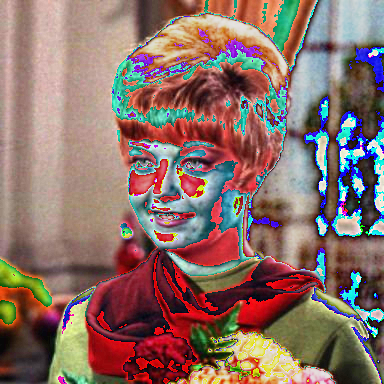

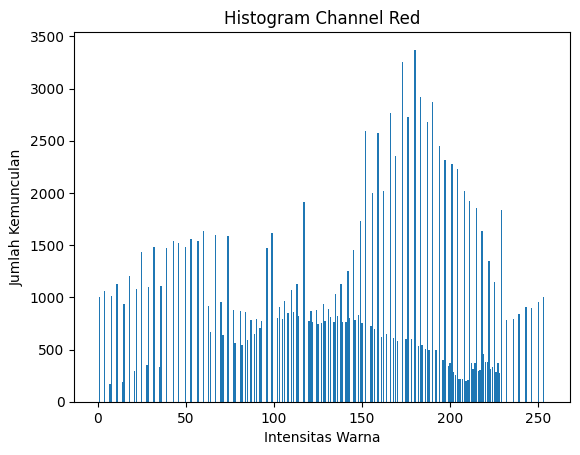

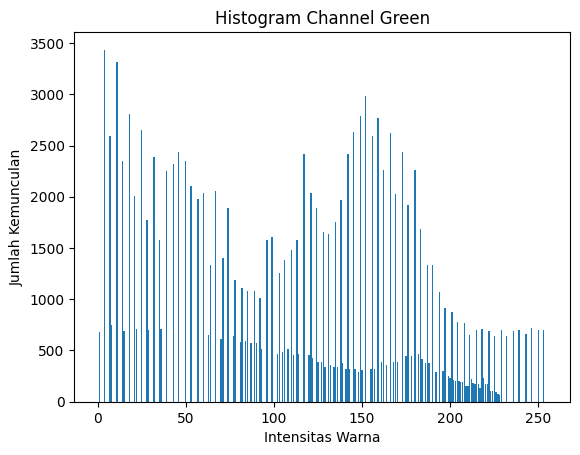

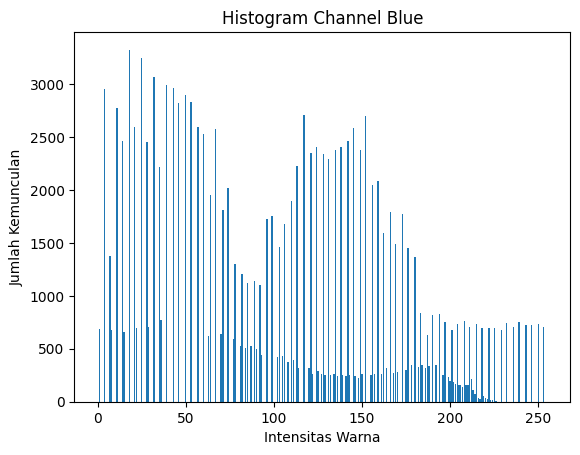

In [15]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
cv2_imshow(img)



a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)

height, width, depth = np.shape(img)

#finding histogram
for i in range(width):
    for j in range(height):
        g = img[j,i]
        a[g] = a[g]+1

print(a)

#performing histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,),dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp;
    b[i] = round(b[i] * 255);

# b now contains the equalized histogram
b=b.astype(np.uint8)

print(b)

#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = img[j,i]
        img[j,i]= b[g]

cv2_imshow(img)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

plt.title("Histogram Channel Red")
plt.ylabel("Jumlah Kemunculan");
plt.xlabel("Intensitas Warna");
plt.bar(names, red)
plt.show()
plt.title("Histogram Channel Green")
plt.ylabel("Jumlah Kemunculan");
plt.xlabel("Intensitas Warna");
plt.bar(names, green)
plt.show()
plt.title("Histogram Channel Blue")
plt.ylabel("Jumlah Kemunculan");
plt.xlabel("Intensitas Warna");
plt.bar(names, blue)
plt.show()

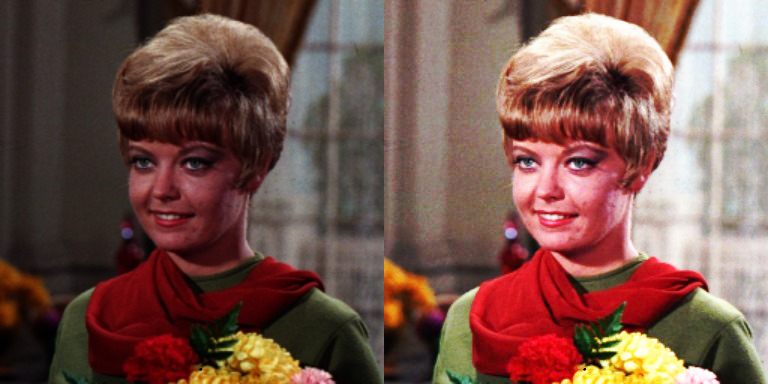

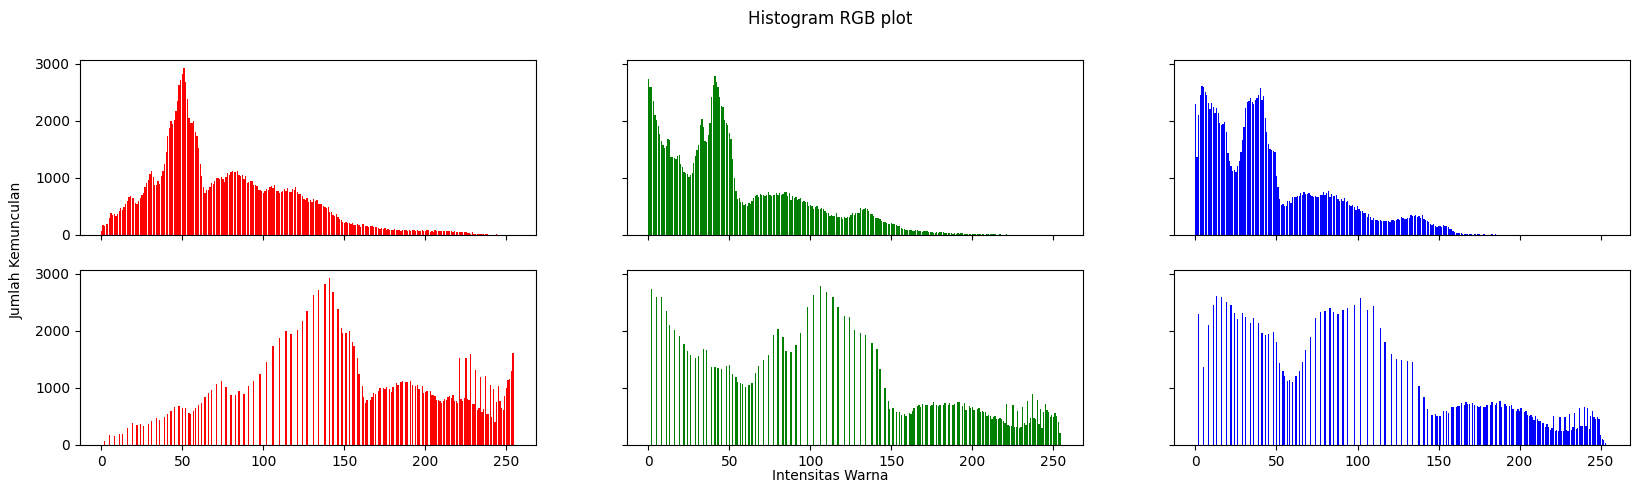

In [16]:
#histogram equalization benar
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

histo_asli = histog(img)


#convert to NumPy array
img_array = np.asarray(img)

"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))      #concatenate image
cv2_imshow(final_frame)

names = np.arange(256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

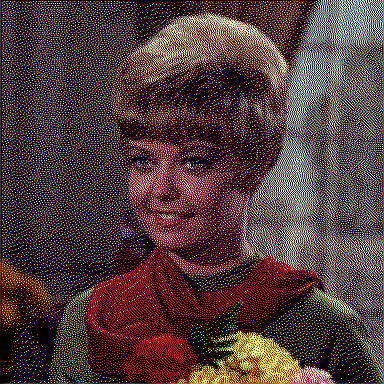

In [17]:
inMat = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
height, width, depth = np.shape(inMat)
#https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering
    #https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
    #input is supposed as color
    # grab the image dimensions
   # height, width, depth = np.shape(inMat)

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

    # loop over the image
for y in range(0, height-1):
  for x in range(1, width-1):
    # threshold the pixel
    old_b = inMat[y, x, 0]
    old_g = inMat[y, x, 1]
    old_r = inMat[y, x, 2]
    samplingF = 1
    new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
    new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
    new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)


    inMat[y, x, 0] = new_b
    inMat[y, x, 1] = new_g
    inMat[y, x, 2] = new_r




    quant_error_b = old_b - new_b
    quant_error_g = old_g - new_g
    quant_error_r = old_r - new_r


    inMat[y, x+1, 0] = minmax(inMat[y, x+1, 0] + quant_error_b * 7 / 16.0)
    inMat[y, x+1, 1] = minmax(inMat[y, x+1, 1] + quant_error_g * 7 / 16.0)
    inMat[y, x+1, 2] = minmax(inMat[y, x+1, 2] + quant_error_r * 7 / 16.0)

    inMat[y+1, x-1, 0] = minmax(inMat[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
    inMat[y+1, x-1, 1] = minmax(inMat[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
    inMat[y+1, x-1, 2] = minmax(inMat[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


    inMat[y+1, x, 0] = minmax(inMat[y+1, x, 0] + quant_error_b * 5 / 16.0)
    inMat[y+1, x, 1] = minmax(inMat[y+1, x, 1] + quant_error_g * 5 / 16.0)
    inMat[y+1, x, 2] = minmax(inMat[y+1, x, 2] + quant_error_r * 5 / 16.0)


    inMat[y+1, x+1, 0] = minmax(inMat[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
    inMat[y+1, x+1, 1] = minmax(inMat[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
    inMat[y+1, x+1, 2] = minmax(inMat[y+1, x+1, 2] + quant_error_r * 1 / 16.0)


            #   quant_error  := oldpixel - newpixel
            #   pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
            #   pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
            #   pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
            #   pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16

cv2_imshow(inMat)